In [20]:
# Importeren van de nodige packages
# Vul zelf aan met extra packages als dit nodig is voor de oefeningen!
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

----

## Vraag 1 [2 pt]

Wat is het meetniveau van elk van deze variabelen:

1. [0.5pt] de afstand thuis-werk in kilometers
2. [0.5pt] het meest frequent gebruikte vervoersmiddel om boodschappen te doen van de respondenten (te voet, per fiets, per trein, ...)
3. [0.5pt] frequentie van het gebruik van het openbaar vervoer (nooit, minder dan 1 keer per week, 1 keer per week, 2 keer per week, meer dan 2 keer per week)
4. [0.5pt] het geboortejaar van de respondenten

### Antwoord

1. Ratio 
2. Nominaal 
3. Nominaal
4. Ordinaal

----

## Vraag 2 [3 pt]

Ziekenhuizen zijn verplicht om aan kwaliteitszorg te doen. Nadat een patiënt uit het ziekenhuis werd ontslagen na een opname, krijgt deze een e-mail. De e-mail bevat een link naar een enquête waarlangs de patiënt de gekregen zorg kan beoordelen.

1. [1pt] Is dit een aselecte steekproef/random sample? Leg uit.
2. [1pt] Welk type fout(en) wordt hier gemaakt?
3. [1pt] Is dit een goede steekproef? Leg uit.

### Antwoord

1. Neen, mensen die geen digitale email bezitten zullen de enquête nooit krijgen. Of mensen die nooit ontslagen worden en permanent in het ziekenhuis verblijven, deze zullen ook de enquête niet kunnen invullen
2. 
- Sampling error
  - Accidental: Het is mogelijk dat door puur geluk, enkel maar mannen en geen vrouwen de mail met de enquête kregen.
  - Systematic: Alleen mensen met een email zitten in de steekproef
- Non-Sampling
  - Accidental: Iemand duidt het verkeerde antwoord aan in de enquête
  - Systematic: Respondenten liegen in de enquête, ze zeggen bijvoorbeeld dat het slecht was, terwijl dit niet het geval was.
3. Neen, het is geen aselecte steekproef die representatief is voor de populatie

----

## Vraag 3 [3pt]

Men ondervroeg een random sample van huurders naar de huurprijs die zij maandelijks moeten betalen.

1. [2pt] Wat is het 95% betrouwbaarheidsinterval voor de gemiddelde huurprijs?
2. [1pt] Zeg in je eigen woorden wat de betekenis is van dit interval.

In [2]:
dfhuur = pd.DataFrame(data={
    'huur': [499,418,466,489,485,402,409,544,565,560,548,513,502,561,513,590,546,555,548,613,685,655,659,652,656,630,604,601,668,669,610,632,654,605,752,799,779,796,714,788,705,754,719,723,701,799,743,782,740,747,763,723,710,757,734,713,742,717,764,718,795,785,747,759,806,871,868,810,869,837,828,830,812,867,847,886,879,881,874,869,875,898,845,854,890,844,835,831,838,894,826,896,866,829,841,806,842,842,872,895,871,881,849,895,838,862,890,883,842,817,828,860,816,817,814,882,888,904,918,993,999,915,973,912,984,939,944,990,941,981,933,965,951,908,946,911,964,943,965,919,971,942,940,920,934,931,999,992,926,959,973,983,940,950,935,1079,1042,1033,1007,1078,1066,1027,1052,1009,1030,1015,1064,1067,1071,1089,1012,1018,1016,1016,1063,1328,1147,1185,1192,1162]
})

In [11]:
n = len(dfhuur.huur)
s = dfhuur.huur.std(ddof=1)
print(stats.t.interval(0.95, df=n-1, loc=dfhuur.huur.mean(), scale=s/np.sqrt(n)))
print("[%.4f, %.4f]" % stats.t.interval(0.95, df=n-1, loc=dfhuur.huur.mean(), scale=s/np.sqrt(n)))

(808.7589624912348, 858.1410375087653)
[808.7590, 858.1410]


### Antwoord

1. [808.7590, 858.1410]
2. Een betrouwbaarheidsinterval van 95% is een interval vanwaar we 95% zeker zijn dat het de gemiddelde huurprijs zal bevatten 


----

## Vraag 4 [4 pt] 

In het Onderzoek Verplaatsingsgedrag Vlaanderen (2021-2022) vinden we de volgende cijfers in verband met de gemiddelde afstand tussen thuisadres en werkadres, namelijk $\mu = 19.70~km$ en $\sigma = 23.35~km$.

1. [1pt] Hoeveel procent van de werknemers wonen op minder dan 5 km van hun werk?

2. [1pt] Hoeveel procent van de werknemers wonen op meer dan 50 km van hun werk?

3. [1pt] In het kader van de elektrische fiets is er een groot potentieel bij werknemers die tussen de 10 km en 20 km van hun werk wonen. Over welk percentage van werknemers gaat het?

4. [1pt] 75% van de werknemers woont op minder dan hoeveel kilometer van hun werk?

### Antwoord

1. 0.2645 procent
2. 0.0972 procent
3. 0.1662 procent
4. 35.4493 kilometer


In [13]:
mu = 19.7
s = 23.35

print("1: %.4f" % stats.norm.cdf(5, mu, s))
print("2: %.4f" % stats.norm.sf(50, mu, s))
print("3: %.4f" % (stats.norm.cdf(20, mu, s) - stats.norm.cdf(10, mu, s)))
print("4: %.4f" % stats.norm.isf(1-0.75, loc=mu, scale=s))


1: 0.2645
2: 0.0972
3: 0.1662
4: 35.4493


----

## Vraag 5 [3 pt] 

Een werknemer die veel moet bellen heeft geschat dat wanneer ze een klant belt, de de kans dat ze de klant bereikt 60% is (onafhankelijk van het aantal keer dat ze al gebeld heeft). 

1. [1pt] Bereken de kans dat de werknemer haar klant bereikt bij het eerste gesprek.

2. [1pt] Bereken de kans dat de werknemer haar klant bereikt bij het tweede gesprek.

3. [1pt] Bereken de kans dat de werknemer geen succes heeft bij twee opeenvolgende gesprekken.


### Antwoord

1. De kans is 0.6000
2. De kans is 0.2400
3. De kans is 0.1600


In [14]:
# bellen is onafhankelijk van de vorige keer dat er gebeld is
# Bij vraag 2, is het de 1ste keer mislukt is

p_bereikt = 0.6
p_niet_bereikt = 1 - p_bereikt

print("1: %.4f" % p_bereikt)
print("2: %.4f" % (p_niet_bereikt * p_bereikt))
print("3: %.4f" % (p_niet_bereikt * p_niet_bereikt))

1: 0.6000
2: 0.2400
3: 0.1600


----

## Vraag 6 [5 pt] 

Het gewicht van jongens op een bepaalde leeftijd is normaal verdeeld met een gemiddelde van 37.8 kg. Tegen een weeshuis in een ontwikkelingsland wordt een klacht ingediend door een NGO dat de kinderen die er verblijven ondervoerd zijn. Een aselecte steekproef levert de hieronder gegeven metingen op.

Is er reden om te vermoeden dat de jongens in dit weeshuis ondervoed zijn? Gebruik een significantieniveau van 5%.

1. [1pt] Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!

2. [1pt] Formuleer de nulhypothese en de alternatieve hypothese

3. [1pt] Bereken de gepaste toetsingsgrootheid (teststatistiek) voor deze toets. Geef het symbool en de waarde.

4. [1pt] Bereken de p-waarde.

5. [1pt] Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.

In [15]:
weights = np.array(
    [36.8, 37.3, 37.4, 37.2, 32. , 35.3, 40.5, 35.3, 31.2, 39.6,
     36.1, 29.5, 35. , 37. , 35.6, 35. , 36.8, 38.1, 39.6, 35.6,
     42.3, 38.6, 37.8, 39.2, 39.4])

In [24]:
m_sample = np.mean(weights)
print("Mean sample: %.4f" % m_sample)

s_sample = np.std(weights,ddof=1)

p = stats.t.cdf(m_sample, loc = 37.8, scale = s_sample / math.sqrt(n), df = n - 1)
print(f"p-waarde: {p}")

Mean sample: 36.7280
p-waarde: 7.706520293724057e-07


### Antwoord

1. We passen een left tailed t test toe. We gebruiken een t test omdat we niet weten wat de standaardafwijking van de populatie is. We gebruiken een left tailed test omdat we willen kijken als de jongens ondervoed zijn, of met andere woorden als het gewicht minder is.
2. 
- $H_0: \mu = 37.8$ (Het gewicht van de jongens in het ontwikkelingsland is hetzelfde als die van gezonde jongens)
- $H_1: \mu < 37.8$ (Het gewicht van de jongens in het ontwikkelingsland is lager dan dat van de gezonde jongens)

3. De toetsingsgrootheid is $\overline{x} = 36.7280$
4. De p-waarde is $7.7065e-07$
5. De p-waarde is kleiner dan het significantie niveau van 5%. We verwerpen dus de nul hypothese en besluiten dat bij deze steekproef, er voldoende bewijs is om te besluiten dat het gewicht van de jongens in het ontwikkelingsland inderdaad lager is die van gezonde jongens


----

## Vraag 7 [6 pt] 

In het Onderzoek Verplaatsingsgedrag Vlaanderen (2021-2022) vinden we de volgende cijfers in verband met de verdeling van het rijbewijsbezit volgens netto-inkomen op persoonsniveau voor personen vanaf 18 jaar (exclusief scholieren en studenten).  Is er een verband tussen het inkomen en het al dan niet hebben van een rijbewijs?

1. [1pt] Welke hypothesetoets ga je toepassen om deze onderzoeksvraag te beantwoorden? Wees zo specifiek mogelijk!

2. [1pt] Formuleer de nulhypothese en de alternatieve hypothese

3. [1pt] Bereken de gepaste toetsingsgrootheid (teststatistiek) voor deze toets. Geef het symbool en de waarde

4. [1pt] Bereken de p-waarde

5. [1pt] Trek een besluit op basis van de vorige stap en formuleer een antwoord op de onderzoeksvraag.

6. [1pt] Hoeveel procent van de ondervraagden heeft geen rijbewijs?

In [99]:
dfrijbewijs = pd.DataFrame(data={
    'inkomen': ['0 - 1000 EUR', '1001 - 1500 EUR', '1501 - 2000 EUR', '2001 - 2500 EUR', '2501 - 3000 EUR', '>3000 EUR', 'wenst niet te antwoorden op deze vraag'],
    'ja': [149, 469, 800, 653, 325, 270, 230],
    'neen': [61, 157, 55, 20, 10, 4, 51]}).set_index('inkomen')

# types = ['0 - 1000 EUR', '1001 - 1500 EUR', '1501 - 2000 EUR', '2001 - 2500 EUR', '2501 - 3000 EUR', '>3000 EUR', 'wenst niet te antwoorden op deze vraag']
# n_types = len(types)

# observed =   np.array(dfrijbewijs.ja)
# expected_p = np.array([   1/n, 1/n, 1/n, 1/n, 1/n, 1/n, 1/n])
# expected = expected_p * sum(observed)
# print(expected)

# chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

# observed = pd.crosstab(dfrijbewijs.ja, dfrijbewijs.index)
# chi2, p, df, expected = stats.chi2_contingency(observed)


# print("Chi-squared        χ² = %.4f" % chi2)
# print("p-value             p = %.4f" % p)

In [110]:

observed = pd.crosstab(dfrijbewijs.ja, dfrijbewijs.index)
chi2, p, df, expected = stats.chi2_contingency(observed)
 
 
print("Chi-squared        χ² = %.4f" % chi2)
print("p-value             p = %.4f" % p)

Chi-squared        χ² = 42.0000
p-value             p = 0.2270


In [114]:
sumJa = sum(dfrijbewijs.ja)
sumNeen = sum(dfrijbewijs.neen)
totaalSum = sumJa + sumNeen

print("Procent geen rijbewijs %.4f" % (sumNeen / totaalSum))

Procent geen rijbewijs 0.1100


### Antwoord

1. We passen hierbij de chi kwadraat test voor onafhankelijkheid toe. In het geval dat er geen verband is tussen het inkomen en het al dan niet hebben van een rijbewijs, zouden de afwijkingen klein moeten zijn.
2. 

- $H_0$: Er is geen verband tussen het inkomen en het al dan niet hebben van een rijbewijs (de verschillen tussen de geobserveerde en verwachte waarden zijn klein)
- $H_A$: Er is een verband tussen het inkomen en het al dan niet hebben van een rijbewijs (de verschillen tussen de geobserveerde en verwachte waarden zijn groot)

3. De toetsingsgrootheid voor deze toets is $\chi^2 = 42.0000$
4. De p-waarde is: 0.2270
5. De p-warde is hoger dan het significantie niveau, we verwerpen de nul hypothese dus niet. Er is dus geen verband tussen het inkomen en het al dan niet hebben van een rijbewijs
6. Procent geen rijbewijs 11%

----

## Vraag 8 [13 pt] 

Hieronder vind je de restaurant scores voor een aantal restaurants uit New York City (NYC) en Long Island (LI).

1. [1pt] Bereken eerst op basis van de score voor *eten*, *decor* en *service* de *totaalscore*. **Als je de totaalscore niet kan berekenen, werk dan verder met de score voor het eten.**

2. [1pt] Maak de onderstaande grafiek.

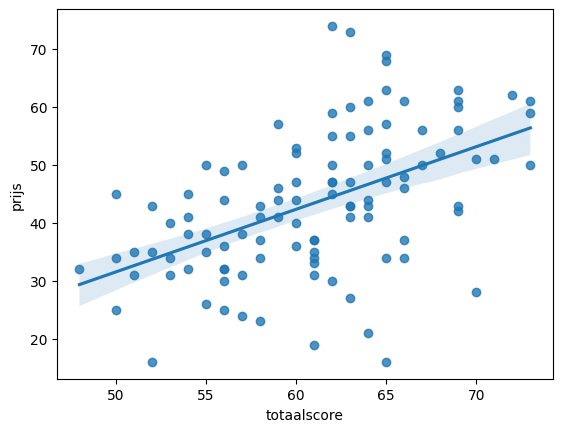

3. [2pt] Maak gebruik van lineaire regressie om te proberen de *prijs* te voorspellen op basis van de *totaalscore*. Geef de vergelijking van de regressierechte.

4. [1pt] Geef de geschatte *prijs* voor een *totaalscore* = 70.

5. [1pt] Bereken de correlatiecoëfficient (symbool + waarde).

6. [1pt] Geef de interpretatie voor de waarde van de correlatiecoëfficient.

7. [1pt] Geef een overzicht van het aantal, minimum, maximum, gemiddelde, standaarddeviatie, ... in de kolommen met kwantitatieve variabelen.

8. [1pt] De variatiecoëfficiënt is een spreidingsmaat die onafhankelijk is van de eenheid waarin gegevens zijn uitgedrukt en wordt gedefinieerd als de standaarddeviatie gedeeld door het gemiddelde. Bereken de variatiecoëfficiënt voor *de score voor eten*.

9. [1pt] Hoeveel restaurants zijn er in New York City met een *prijs* hoger dan \$65 (\$65 niet inbegrepren)?

10. Zijn de *prijzen* in New York City significant ($\alpha = 0.05$) hoger dan in Long Island?

    - [0.5pt] Met welke statistische toets ga je dit bepalen?
    - [0.5pt] Formuleer de nulhypothese en de alternatieve hypothese
    - [1pt] Bereken de overschrijdingskans $p$
    - [1pt] Trek een besluit op basis van deze waarde en beantwoord de onderzoeksvraag.

In [75]:
dfrestaurants = pd.DataFrame(
    data={'naam': ["101","12th St. Bar & Grill","202 Café","212","24 Prince","26 Seats","360","41 Greenwich Avenue","44","44 X Hell's Kitchen","5 Ninth","71 Irving Place","718","A.O.C.","A.O.C. Bedford","Abboccato","Abigael's","Above","Adrienne's Pizzabar","Aesop's Tables","Agata & Valentina Ristorante","Agave","Agnanti","Aix Brasserie","Aja","Aji Sushi","Areo","Bouley, Upstairs","Casa Mono","Cesca","Coals","Etats-Unis","Gari","Henry's End","ino","inoteca","Joya","Lupa","MarkJoseph Steakhouse","Noodle Pudding","Norma's","Osaka","Pearl Oyster Bar","Piccola Venezia","Po","Scalinatella","Sparks Steak House","Spigolo","Sushi Ann","Sushi Sen-nin","Tommaso","Wolfgang's Steakhouse","Yakitori Totto","105 Harbor","1770 House Restaurant & Inn","25 East American Bistro","56th Fighter Group","Abel Conklin's","Adirondack Grill","Akbar","Albert's Mandarin Gourmet","Allison's Ristorante","Almond","Amici","Aqua Blue Bar & Grill","Argyle Grill & Tavern","Ariana","Ayhan's Fish Kebab","Ayhan's Mediterranean Café","B. Smith's","Baang Café & Bar","Babylon Carriage House","Bamboo Restaurant & Sushi","Barney's","Barolo","Basil Leaf Café","Bay & Main","Bayou, The","Bayport House, The","Bayview Inn & Restaurant","Beacon","Bedlam Street Fish & Clam","Bella Vita City Grill","Bellport, The","Benihana","Benny's Ristorante","Maureen & Daughters Kitchen","Minami","Mirko's","Nisen","Palm","Plaza Café","Robert's","Rothmann's Steakhouse","Royal Tangra Masala","Sempre Vivolo","Soigne","Sole","Starr Boggs","Steve's Piccola Bussola","Stonewalls","Tellers American Chophouse","Trattoria Diane","Vine Street Café","Vintage Prime Steakhouse","Yuki's Palette"],
    'locatie': ["NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","NYC","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI","LI"],
    'eten': [20,21,21,17,18,23,23,18,20,21,20,19,22,19,23,23,20,18,24,22,18,19,24,21,20,21,25,25,25,23,25,25,26,25,24,23,25,25,25,25,25,25,26,25,25,25,25,25,25,25,25,25,25,20,24,16,14,22,16,19,23,19,21,22,18,21,20,20,18,16,22,21,20,26,24,18,19,22,21,24,20,22,21,24,17,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25],
    'decor': [18,19,17,17,17,16,15,18,22,18,22,17,19,16,21,20,16,19,17,18,16,19,15,21,23,14,20,16,18,21,17,16,17,14,14,18,19,18,17,18,20,17,14,17,16,17,19,16,17,15,18,20,19,22,25,20,21,17,21,17,18,19,15,18,17,21,17,17,15,23,23,24,18,23,20,17,15,16,21,21,19,19,17,19,17,18,19,21,21,20,18,21,21,22,14,22,24,15,24,15,21,26,21,15,21,15],
    'service': [17,20,18,16,15,19,19,19,18,19,17,16,19,16,21,21,18,18,17,20,14,18,19,20,20,20,21,18,20,21,19,23,19,24,18,20,20,21,23,22,21,20,19,23,21,21,21,21,21,20,22,20,20,20,23,17,16,21,16,18,22,21,18,21,17,19,20,19,17,17,19,18,18,24,22,19,18,18,20,24,18,21,20,21,19,24,21,24,23,21,23,24,21,22,18,24,24,21,20,21,23,22,22,23,23,21],
    'prijs': [38,36,32,45,34,37,38,35,52,43,57,16,40,35,51,61,45,50,23,44,32,36,34,59,43,26,48,46,47,57,19,56,74,43,25,37,21,50,63,34,37,30,41,52,47,73,68,55,60,53,47,69,44,50,62,40,31,47,31,32,27,44,41,33,43,35,31,30,25,49,43,41,44,59,46,38,35,32,47,42,50,45,41,41,34,50,16,28,63,34,61,51,56,60,24,51,50,34,56,37,43,61,52,55,61,31]})

dfrestaurants["totaalScore"] = dfrestaurants.eten + dfrestaurants.decor + dfrestaurants.service
print(f"totaalScore {dfrestaurants.totaalScore}")


totaalScore 0      55
1      60
2      56
3      50
4      50
       ..
101    73
102    68
103    63
104    69
105    61
Name: totaalScore, Length: 106, dtype: int64


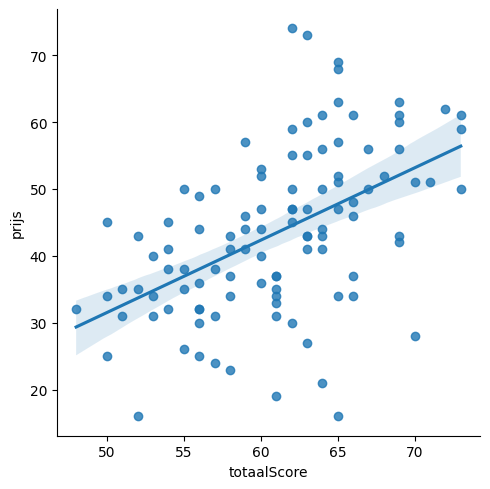

In [76]:
dfrestaurants = dfrestaurants.reset_index()

sns.lmplot(data=dfrestaurants, x='totaalScore', y='prijs');

In [77]:
from sklearn.linear_model import LinearRegression

restaurant_x = dfrestaurants.totaalScore.values.reshape(-1,1) #Wat er eigenlijk gebeurt is dat de "gewone" array [ ... , ... , ...] wordt omgezet in een array waar elk element zelf nog eens in een array zit [ [...], [...], [...]]. Dat is omdat de functie hieronder een 2D array wilt. Als je maar een 1D array meegeeft, krijg je een foutmelding en daarin staat ook dat je het kan oplossen door values.reshape
restaurant_y = dfrestaurants.prijs

weight_model = LinearRegression().fit(restaurant_x, restaurant_y) # (x is independant variable, y is dependant variable)

print(f"Regression line: ŷ = {weight_model.intercept_:.4f} + {weight_model.coef_[0]:.4f} x")

Regression line: ŷ = -22.5688 + 1.0817 x


In [80]:
y = -22.5688 + 1.0817 * 70
print("geschatte prijs %.4f " % y)

geschatte prijs 53.1502 


In [82]:
cor = np.corrcoef(
    dfrestaurants.totaalScore,
    dfrestaurants.prijs)[0][1]
print(f"R ≈ {cor:.4f}")

R ≈ 0.5035


In [83]:
dfrestaurants.head()

,index,naam,locatie,eten,decor,service,prijs,totaalScore
0,0,101,NYC,20,18,17,38,55
1,1,12th St. Bar & Grill,NYC,21,19,20,36,60
2,2,202 Café,NYC,21,17,18,32,56
3,3,212,NYC,17,17,16,45,50
4,4,24 Prince,NYC,18,17,15,34,50


In [87]:
# De variatiecoëfficiënt is een spreidingsmaat die onafhankelijk is van de eenheid waarin gegevens zijn uitgedrukt en wordt gedefinieerd als de standaarddeviatie gedeeld door het gemiddelde. Bereken de variatiecoëfficiënt voor *de score voor eten*.

print("De variatiecoëfficiënt %.4f" % (dfrestaurants.eten.std(ddof=1) / dfrestaurants.eten.mean()))

De variatiecoëfficiënt 0.1292


In [92]:
# 9. [1pt] Hoeveel restaurants zijn er in New York City met een *prijs* hoger dan \$65 (\$65 niet inbegrepren)?

dfrestaurants = dfrestaurants[dfrestaurants.locatie == "NYC"]
dfrestaurants = dfrestaurants[dfrestaurants.prijs > 65]

print(len(dfrestaurants))

4


In [ ]:
# 10. Zijn de *prijzen* in New York City significant ($\alpha = 0.05$) hoger dan in Long Island?
# 
    # - [0.5pt] Met welke statistische toets ga je dit bepalen?
    # - [0.5pt] Formuleer de nulhypothese en de alternatieve hypothese
    # - [1pt] Bereken de overschrijdingskans $p$
    # - [1pt] Trek een besluit op basis van deze waarde en beantwoord de onderzoeksvraag.



### Antwoord

1. totaalScore = dfrestaurants.eten + dfrestaurants.decor + dfrestaurants.service

2. sns.lmplot(data=dfrestaurants, x='totaalScore', y='prijs');

3. Regression line: ŷ = -22.5688 + 1.0817 x

4. geschatte prijs 53.1502 

5. R ≈ 0.5035

6. Er is een stijgende en matige lineaire relatie 

7. 

8. De variatiecoëfficiënt 0.1292

9. 4

10. 

----

## Vraag 9 [7 pt]

Hieronder staat de omzet van Wal-Mart per kwartaal (uitgedrukt in billion dollar)

1. [1pt] Converteer de 'datum' naar het datatype datetime en stel deze in als index.

2. [1pt] Maak de onderstaande plot.

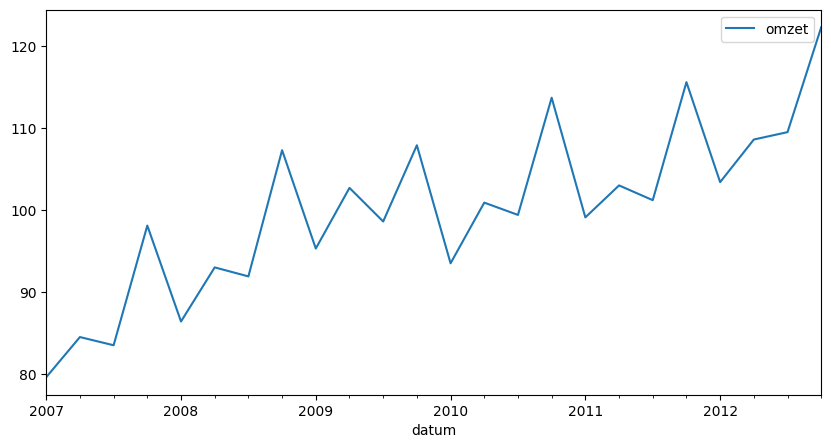

3. Maak een voorspelling voor de omzet van het volgende boekhoudkundige jaar met behulp van de meest geschikte methode. Leg uit waarom je deze methode hebt gekozen [1pt]. Geef ook de voorspelde waarden [1pt].

4. Maak een plot met de geobserveerde waarden, de door het model geschatte (*fitted*) waarden [1pt] en de voorspelling voor het volgende boekhoudkundige jaar [1pt].

5. [1pt] In welk kwartaal zal de omzet voor het eerst meer dan $150 billion bedragen?

In [48]:
dfwalmart = pd.DataFrame(data={
    'datum': ['2007/01/01', '2007/04/01', '2007/07/01', '2007/10/01', '2008/01/01', '2008/04/01', '2008/07/01', '2008/10/01','2009/01/01', '2009/04/01', '2009/07/01', '2009/10/01','2010/01/01', '2010/04/01', '2010/07/01', '2010/10/01','2011/01/01', '2011/04/01', '2011/07/01', '2011/10/01','2012/01/01', '2012/04/01', '2012/07/01', '2012/10/01'],
    'kwartaal': ['2007-1','2007-2','2007-3','2007-4','2008-1','2008-2','2008-3','2008-4','2009-1','2009-2','2009-3','2009-4','2010-1','2010-2','2010-3','2010-4','2011-1','2011-2','2011-3','2011-4','2012-1','2011-2','2011-3','2011-4'],
    'omzet': [79.6,84.5,83.5,98.1,86.4,93,91.9,107.3,95.3,102.7,98.6,107.9,93.5,100.9,99.4,113.7,99.1,103,101.2,115.6,103.4,108.6,109.5,122.3]
})

dfwalmart['datum'] = pd.to_datetime(dfwalmart['datum'])

dfwalmart.dtypes

datum       datetime64[ns]
kwartaal            object
omzet              float64
dtype: object

In [49]:
dfwalmart = dfwalmart.set_index('datum')
dfwalmart.head()

,kwartaal,omzet
datum,,
2007-01-01,2007-1,79.6
2007-04-01,2007-2,84.5
2007-07-01,2007-3,83.5
2007-10-01,2007-4,98.1
2008-01-01,2008-1,86.4


<Axes: xlabel='datum'>

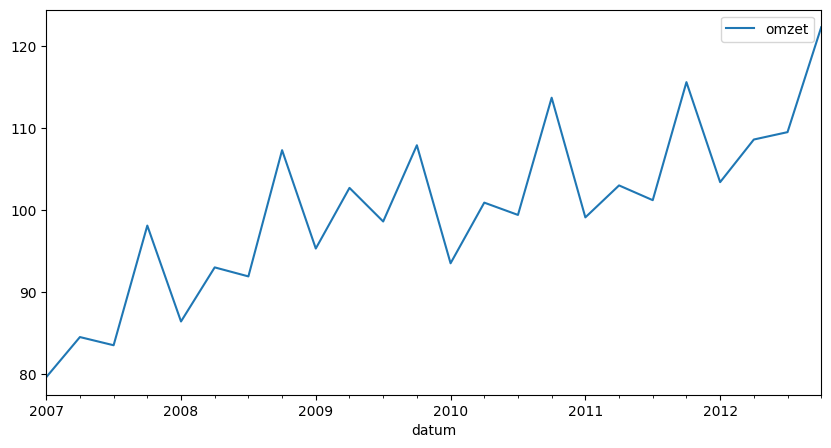

In [50]:
dfwalmart.plot(y='omzet', figsize=[10,5])

In [62]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import Holt


# hier trainen we ons model

train = dfwalmart.omzet

data_des = Holt(train).fit(smoothing_level=.1, smoothing_trend=.2)
# dfwalmart_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12, freq='M').fit()

data_des_predicted = data_des.forecast(12)

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\AppData\Roaming\Python\Python312\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


### Antwoord

1. `dfwalmart['datum'] = pd.to_datetime(dfwalmart['datum'])` en `dfwalmart = dfwalmart.set_index('datum')`

2. `dfwalmart.plot(y='omzet', figsize=[10,5])`

3. Holt/Double exponential smoothing want er is een trend in de data 

4. 

5. 

----

## Vraag 10 [4 pt] 

Een handelaar verhuurt industriële hogedrukreinigers. De vraag per dag naar deze toestellen kan als volgt worden beschreven:

| _x_      | 0    |    1 |    2 |    3 |
| :---     | :--- | :--- | :--- | :--- |
| _P(X=x)_ | 0.15 | 0.40 | 0.30 | 0.15 |

Het beschikbaar houden van zo'n toestel kost 300 EUR per dag, terwijl de huurprijs 700 EUR per dag is. De manager vraagt zich af wat het meest zal opbrengen: 2 toestellen of 3 toestellen per dag beschikbaar stellen.

1. Bepaal de kansfunctie voor:
   
    - [1pt] Kansvariabele _Y_, de winst wanneer er 2 toestellen beschikbaar zijn
    - [1pt] Kansvariabele _W_, de winst wanneer er 3 toestellen beschikbaar zijn

2. [1pt] Wat is de verwachte winst in beide gevallen? M.a.w. bereken $E[Y]$ en $E[W]$.
3. [1pt] Wat is de optimale keuze voor de handelaar?

### Antwoord

1. P(Y)

2. 